# Business Question


Marketing is allocating its advertising budget to different regions. They have requested an analysis of the regions to determine where and when the budget should be allocated


# Approach

* Determine the region where customer spend is greatest per sale (invoice).
* If there is a difference, then determine whether it is statistically significant
* Assess seasonal disparities in purchasing patterns across regions, thereby enabling the initiation of marketing campaigns at distinct periods throughout the year to optimise sales potential.

In [1]:
#read in sales data and view attributes
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
file = "/kaggle/input/online-retail-transaction-records/Online Retail.csv"
df = pd.read_csv(file, index_col = 'index')

df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
index,,,,,,,,
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
#obtain the number of invoices (unique sales) for each country
national_sales = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
total_sales = national_sales.sum()

for country, sales in national_sales.items():
    percentage_of_sales = (sales/total_sales) *100
    print(f"Country: {country:<20} Percentage of Total Sales: {percentage_of_sales:>5.2f}%")

Country: United Kingdom       Percentage of Total Sales: 90.71%
Country: Germany              Percentage of Total Sales:  2.33%
Country: France               Percentage of Total Sales:  1.78%
Country: EIRE                 Percentage of Total Sales:  1.39%
Country: Belgium              Percentage of Total Sales:  0.46%
Country: Spain                Percentage of Total Sales:  0.41%
Country: Netherlands          Percentage of Total Sales:  0.39%
Country: Switzerland          Percentage of Total Sales:  0.29%
Country: Portugal             Percentage of Total Sales:  0.27%
Country: Australia            Percentage of Total Sales:  0.27%
Country: Italy                Percentage of Total Sales:  0.21%
Country: Finland              Percentage of Total Sales:  0.19%
Country: Sweden               Percentage of Total Sales:  0.18%
Country: Norway               Percentage of Total Sales:  0.15%
Country: Channel Islands      Percentage of Total Sales:  0.13%
Country: Japan                Percentage

In [3]:
national_spend = df.groupby(['Country', 'InvoiceNo'])[['Quantity', 'UnitPrice']].apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum()).groupby('Country').sum().sort_values(ascending=False)

In [4]:
national_spend
total_spend = national_spend.sum()

for country, spend in national_spend.items():
    percentage_of_spend = (spend/total_spend) *100
    print(f"Country: {country:<20} Percentage of Total Sales: {percentage_of_spend:>5.2f}%")

Country: United Kingdom       Percentage of Total Sales: 84.00%
Country: Netherlands          Percentage of Total Sales:  2.92%
Country: EIRE                 Percentage of Total Sales:  2.70%
Country: Germany              Percentage of Total Sales:  2.27%
Country: France               Percentage of Total Sales:  2.03%
Country: Australia            Percentage of Total Sales:  1.41%
Country: Switzerland          Percentage of Total Sales:  0.58%
Country: Spain                Percentage of Total Sales:  0.56%
Country: Belgium              Percentage of Total Sales:  0.42%
Country: Sweden               Percentage of Total Sales:  0.38%
Country: Japan                Percentage of Total Sales:  0.36%
Country: Norway               Percentage of Total Sales:  0.36%
Country: Portugal             Percentage of Total Sales:  0.30%
Country: Finland              Percentage of Total Sales:  0.23%
Country: Channel Islands      Percentage of Total Sales:  0.21%
Country: Denmark              Percentage

# Finding 1
We observe that the UK represents over 90% of Sales, and 84% of total revenue. Notably while Netherlands represent only 0.39% of sales they represent 2.92% of total revenue. Similarly, Australia represent only 0.27% of sales, yet they contibute 1.41% of total revenue. applying the marketing budget to attract more customers in the Netherlands and Australia may be most effective. 

Follow up enquiry: 
Is the difference between UK's Australia's and Netherlands' spend per sale statistically significant? If yes, are there differences between the time of the year that customers in these regions make purchases.

In [5]:
# create function that obtains data for specific country, and another function that can remove outliers from that country data.
def get_country_data(country, df: pd.DataFrame):
    
    if 'Country' not in df.columns:
        raise ValueError('Dataframe does not contain Country attribute/column')
    else:
        return df[df['Country']== country]

def remove_outliers(series: pd.Series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = (q3 - q1)
    low_outlier = q1 - (1.5*iqr)
    high_outlier = q3+(1.5*iqr)
    
    return series[(series>low_outlier)&(series<high_outlier)]

In [6]:
#obtain individual sales for each country
netherlands_sales = get_country_data('Netherlands', df)
uk_sales = get_country_data('United Kingdom', df)
au_sales = get_country_data('Australia', df)

In [7]:
netherlands_sales_clean = netherlands_sales.groupby('InvoiceNo')[['Quantity', 'UnitPrice']].apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())
netherlands_sales_clean = netherlands_sales_clean[netherlands_sales_clean > 0]

uk_sales_clean = uk_sales.groupby('InvoiceNo')[['Quantity', 'UnitPrice']].apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())
uk_sales_clean = uk_sales_clean[uk_sales_clean > 0]

au_sales_clean = au_sales.groupby('InvoiceNo')[['Quantity', 'UnitPrice']].apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())
au_sales_clean = au_sales_clean[au_sales_clean>0]

In [8]:
netherlands_sales_clean = remove_outliers(netherlands_sales_clean)
uk_sales_clean = remove_outliers(uk_sales_clean)
au_sales_clean = remove_outliers(au_sales_clean)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


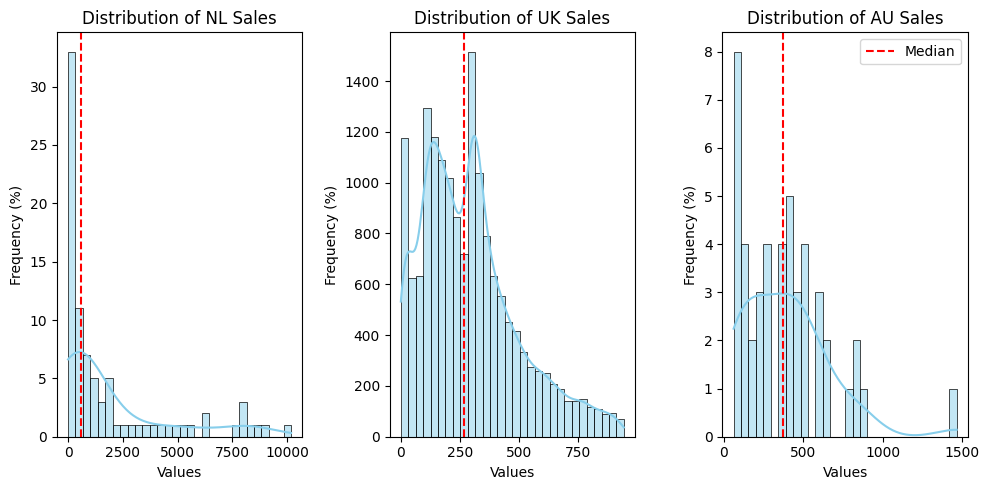

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

sns.histplot(netherlands_sales_clean, bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of NL Sales')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency (%)')
axes[0].axvline(np.median(netherlands_sales_clean), linestyle = '--', color='red')

sns.histplot(uk_sales_clean, bins=30, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title('Distribution of UK Sales')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Frequency (%)')
axes[1].axvline(np.median(uk_sales_clean), linestyle = '--', color='red')

sns.histplot(au_sales_clean, bins=30, kde=True, color='skyblue', ax=axes[2])
axes[2].set_title('Distribution of AU Sales')
axes[2].set_xlabel('Values')
axes[2].set_ylabel('Frequency (%)')
axes[2].axvline(np.median(au_sales_clean), linestyle = '--', color='red', label="Median")

plt.tight_layout()
plt.legend()
# Show plot
plt.show()


Before applying further statistical analysis to the data, visualisation can help determine whether parametric of non-parametric tests should be applied. Normality of distribution assumption violated for ANOVA. Therefore non-parametic Kruskal -Wallis can be used to measure statistical significance of difference.

In [10]:
from scipy.stats import kruskal

kruskal_result = kruskal(netherlands_sales_clean, uk_sales_clean, au_sales_clean)
print(f"Kruskal result \nF-statistic = {kruskal_result.statistic:>10}, p-value = {kruskal_result.pvalue:<5}")

Kruskal result 
F-statistic = 49.2822766864767, p-value = 1.988335148313428e-11


# Finding 2
We observe a large F-statistic and a p-value less than 0.05. There is a difference in the amount customers in Netherlands, Austrlalia and the UK spend per invoice/sale, and that difference is statistically significant when outliers are removed.

In [11]:
pip install scikit_posthocs

Note: you may need to restart the kernel to use updated packages.


In [12]:
from scikit_posthocs import posthoc_dunn

group_sales = pd.DataFrame({"Invoice Amount": pd.concat([netherlands_sales_clean,uk_sales_clean, au_sales_clean]),
                            "Country" : ['Netherlands'] * len(netherlands_sales_clean)+['United Kingdom']*len(uk_sales_clean) + ['Australia']*len(au_sales_clean)})

dunn_result = posthoc_dunn(group_sales, val_col='Invoice Amount', group_col='Country', p_adjust='bonferroni')
print(dunn_result, "\n")

for each in group_sales['Country'].unique():
    std_dev = group_sales[group_sales['Country'] == each]['Invoice Amount'].std()
    print(f"{each:<15} Std.Dev = {std_dev:<20.2f}")

                Australia   Netherlands  United Kingdom
Australia        1.000000  9.704784e-02    6.693773e-02
Netherlands      0.097048  1.000000e+00    9.000557e-11
United Kingdom   0.066938  9.000557e-11    1.000000e+00 

Netherlands     Std.Dev = 2631.13             
United Kingdom  Std.Dev = 204.06              
Australia       Std.Dev = 278.64              


# Finding 3 
The pair-wise Dunn's test results demonstrate a significant difference in per-sale amounts between the Netherlands and the UK. Furthermore, the Netherlands exhibits a standard deviation approximately 10 times larger than that of the UK and Australia. This discrepancy in standard deviations may contribute to the observed statistical significance, possibly due to the smaller sample size in the Netherlands, leading to increased sample variance. 

If sales volumes increase substantially to UK levels, a reduction in the variance may result, and the per-sale amount may approach equivalence between UK and Netherlands

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
def get_highest_month (df, country):
    if 'Country' not in df:
        return ValueError('Country not attribute of dataframe')
    elif 'InvoiceNo' not in df:
        return ValueError('InvoiceNo not attribute of dataframe')
    elif 'InvoiceDate' not in df:
        return ValueError('InvoiceDate not attribute of dataframe')
    else:
        nation_sales = df[df['Country']==country]
        return nation_sales.groupby(nation_sales['InvoiceDate'].dt.month)['InvoiceNo'].nunique().sort_values(ascending=False).head(3)
        
for nation in ['Australia', 'United Kingdom', 'Netherlands']:
    result = get_highest_month(df, nation)
    for month in result.index:
        print(f"{nation:<20} Month: {month:<10} Total Sales in that Mbonth: {result[month]:<10}")

Australia            Month: 1          Total Sales in that Mbonth: 9         
Australia            Month: 7          Total Sales in that Mbonth: 9         
Australia            Month: 9          Total Sales in that Mbonth: 9         
United Kingdom       Month: 11         Total Sales in that Mbonth: 3113      
United Kingdom       Month: 12         Total Sales in that Mbonth: 2807      
United Kingdom       Month: 10         Total Sales in that Mbonth: 2361      
Netherlands          Month: 11         Total Sales in that Mbonth: 16        
Netherlands          Month: 10         Total Sales in that Mbonth: 15        
Netherlands          Month: 6          Total Sales in that Mbonth: 12        


# Finding 4:
Two of the three highest sales months for Netherlands coincide with those of the United Kingdom (October and November). Although June appears in the top 3 sales months for Netherlands, its significance may be limited due to the small sample size. Therefore, allocating marketing budget based solely on June's high sales for Netherlands might not be advisable.

Australia demonstrates higher sales during the mid-year compared to regions in the northern hemisphere. Given that Australian "spend per sale" matches that of Netherlands and the UK, it could be more effective to allocate marketing budget for mid-year campaigns in Southern hemisphere regions, and end-of-year campaigns for Northern hemisphere regions.

# Conclusions

Marketing Budget Allocation:

* The UK dominates in terms of sales and revenue, representing over 90% of sales and 84% of total revenue.
* Despite low sales volumes, both Netherlands and Australia contribute disproportionately higher percentages of total revenue compared to their sales percentages.
* Allocating marketing budget to attract more customers in the Netherlands and Australia could be effective due to their higher revenue contribution per sale.

Statistical Significance of Spend per Sale:

* Dunn's test results show a significant difference in per-sale amounts between Netherlands and the UK.
* The larger standard deviation in the Netherlands may contribute to the observed statistical significance, potentially due to the smaller sample size leading to increased sample variance.
* If sales volumes increase substantially in the Netherlands to UK levels, variance reduction may occur, and per-sale amounts may approach equivalence between the two countries.

Seasonal Differences in Purchasing Behavior:

* Two of the three highest sales months for Netherlands coincide with those of the United Kingdom (October and November), indicating similar seasonal patterns.
* However, June's significance in Netherlands' sales may be limited due to the small sample size, suggesting caution in allocating marketing budget solely based on June's performance.
* Australia demonstrates higher sales during the mid-year compared to regions in the northern hemisphere, suggesting the potential effectiveness of mid-year campaigns in Southern hemisphere regions and end-of-year campaigns for Northern hemisphere regions.